# Actividad - Estadística básica

* **Nombre:** José Emiliano Riosmena Castañón
* **Matrícula:** A01704245

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [3]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriormente.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
df2 = pd.read_csv('bestsellers with categories.csv', usecols = ['User Rating', 'Reviews', 'Price', 'Genre'])
corr = df2.corr()

¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Las variables que se pueden considerar como relevantes son: User Rating, Reviews y Price, ya que esas sí nos pueden proporcionar información. Por otra parte, la columna Year, aunque es numérica, no nos proporciona la información necesaria para el análisis, por lo que la tomaremos como cualitativa

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

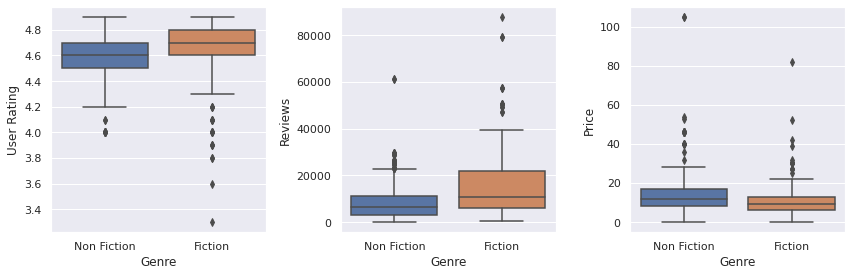

In [8]:
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
sns.boxplot(data = df, y = 'User Rating', ax = axs[0], x = 'Genre')
sns.boxplot(data = df, y = 'Reviews', ax = axs[1], x = 'Genre')
sns.boxplot(data = df, y = 'Price', ax = axs[2], x = 'Genre')
plt.tight_layout()

<Axes: >

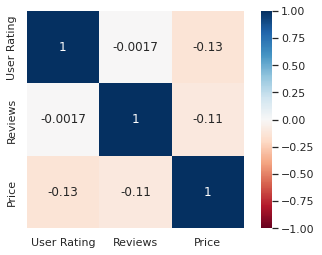

In [9]:
sns.heatmap(data = corr, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True, square = True)

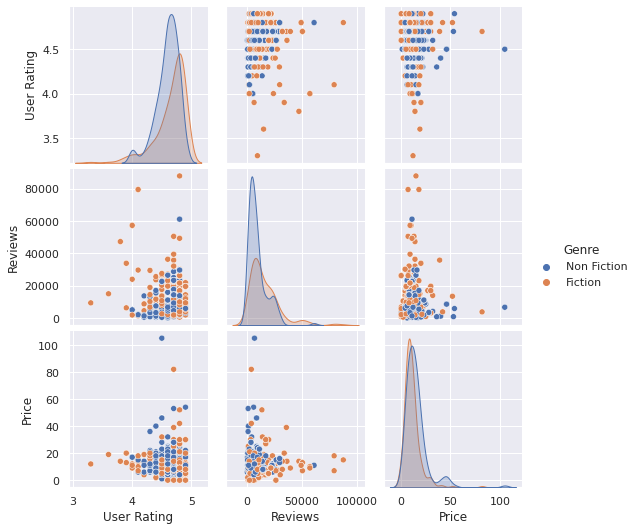

In [11]:
sns.pairplot(data = df2, hue = 'Genre')

Con respecto a los diagramas de caja y bigote, se puede observar que en User Rating el 2° y 3° cuartil tienen un rango que va desde 4.5 a 4.8, el cual esta sujeto a cambiar con respecto al género literario. En el caso de Reviews, tenemos un rango mayor el cual va desde 0 hasta 20000. Y por último el caso de Price no hay un rango tan grande, este va desde 10 hasta 20.
Con respecto al mapa de calor se puede decir que no existe una relación fuerte en ninguna variable, la relación más fuerte que podemos encontrar está del lado negativo con -0.13.
Del gráfico de dispersión podemos observar que sí tenemos un agrupamiento entre los datos presentados.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [12]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
cols = ['User Rating', 'Reviews', 'Price']
x = df.loc[:, cols]

scaler = StandardScaler()
xNorm = scaler.fit_transform(x)
xNorm = pd.DataFrame(xNorm, columns = cols)
xNorm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

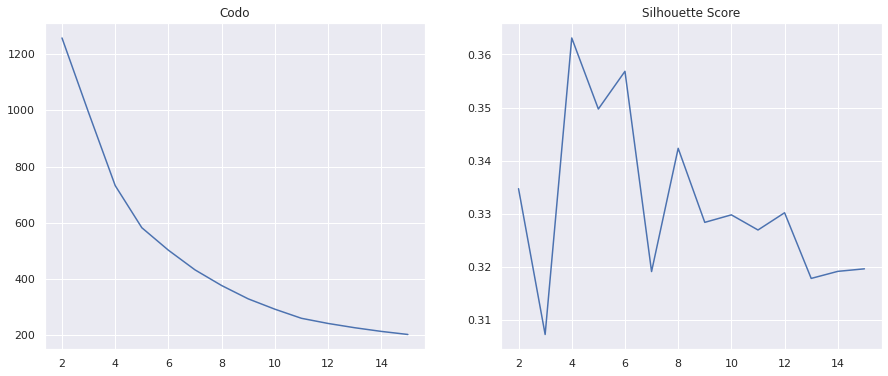

In [13]:
kmax = 16
groups = range(2, kmax)
wcss = []
sil_score = []

for k in groups:
  model = KMeans(n_clusters=k, random_state = 47)
  clusters = model.fit_predict(xNorm)
  wcss.append(model.inertia_)
  sil_score.append(silhouette_score(xNorm, clusters))

# Graficamos el codo y silhouette

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(groups, wcss)
axs[0].set_title('Codo')
axs[1].plot(groups, sil_score)
axs[1].set_title('Silhouette Score')

In [14]:
model = KMeans(n_clusters = 4, random_state = 47)
clusters = model.fit_predict(xNorm)

df2['Grupo'] = clusters.astype('str')
df2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Genre,Grupo
0,4.7,17350,8,Non Fiction,0
1,4.6,2052,22,Fiction,2
2,4.7,18979,15,Non Fiction,0
3,4.7,21424,6,Fiction,0
4,4.8,7665,12,Non Fiction,2


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

0: Muy baratos y excelentes

1: Baratos y buenos

2: Regulares y excelentes

3: Caros y buenos

In [18]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
df2.groupby('Grupo').mean()

,User Rating,Reviews,Price
Grupo,,,
0,4.693846,27444.646154,9.084615
1,4.232143,8631.666667,12.416667
2,4.698065,6753.977419,11.900000
3,4.538462,7219.538462,49.692308


In [17]:
df2.groupby('Grupo').std()

,User Rating,Reviews,Price
Grupo,,,
0,0.184161,12779.526505,3.833825
1,0.208933,9097.337152,5.013736
2,0.118770,4145.890023,6.819423
3,0.144435,6978.798305,18.750508


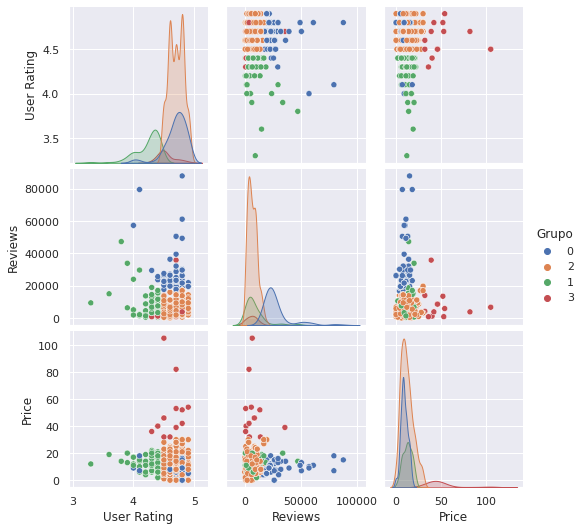

In [19]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data = df2, hue='Grupo')